In [1]:
import pandas as pd
import math
import numpy as np
from matplotlib import pyplot as plt

In [13]:
data = pd.read_csv(r"C:\Users\ardas\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Anaconda3 (64-bit)\data\training.csv")
data2 = pd.read_csv(r"C:\Users\ardas\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Anaconda3 (64-bit)\data\testing.csv")
merged = pd.concat([data,data2])

print(merged)

     age  class
0     24      1
1     21      1
2     26      1
3     27      1
4     28      1
..   ...    ...
145   56      3
146   53      3
147   44      3
148   47      3
149   50      3

[300 rows x 2 columns]


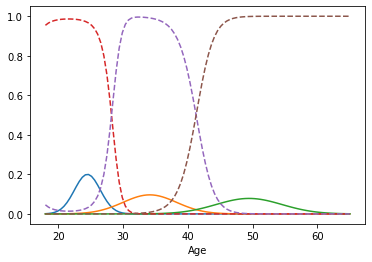

In [14]:
class1 = 0
class1_count = 0
class1_std = 0
class2 = 0
class2_count = 0
class2_std = 0
class3 = 0
class3_count = 0
class3_std = 0

#Counting and adding ages one by one according to their classes
for index, row in data.iterrows():
    if row['class'] == 1:
        class1 += row['age']
        class1_count += 1
    elif row['class'] == 2:
        class2 += row['age']
        class2_count += 1
    elif row['class'] == 3:
        class3 += row['age']
        class3_count += 1

#Calculating mean
class1_mean = class1/class1_count
class2_mean = class2/class2_count
class3_mean = class3/class3_count
total_count = class1_count + class2_count + class3_count

#Calculating standard deviation
for index, row in data.iterrows():
    if row['class'] == 1:
        class1_std += (row['age']-class1_mean)**2
class1_std = math.sqrt(class1_std/class1_count)

for index, row in data.iterrows():
    if row['class'] == 2:
        class2_std += (row['age']-class2_mean)**2
class2_std = math.sqrt(class2_std/class2_count)

for index, row in data.iterrows():
    if row['class'] == 3:
        class3_std += (row['age']-class3_mean)**2
class3_std = math.sqrt(class3_std/class3_count)


#P(X|C=1)
first_array = []
#P(X|C=2)
second_array = []
#P(X|C=3)
third_array = []
#P(C=1|X)
fourth_array = []
#P(C=2|X)
fifth_array = []
#P(C=3|X)
sixth_array = []

age_sample = np.linspace(merged["age"].min(), merged["age"].max(), 100, endpoint=True)
for row in age_sample:
    
    #Likelihood calculation
    first_formula = (1/(math.sqrt(2*math.pi)*class1_std))*math.pow(math.e,((-1/2)*((row-class1_mean)/class1_std)**2))
    first_array.append(first_formula)
    second_formula = (1/(math.sqrt(2*math.pi)*class2_std))*math.pow(math.e,((-1/2)*((row-class2_mean)/class2_std)**2)) 
    second_array.append(second_formula)
    third_formula = (1/(math.sqrt(2*math.pi)*class3_std))*math.pow(math.e,((-1/2)*((row-class3_mean)/class3_std)**2))
    third_array.append(third_formula)
    
    #Posterior probability calculation
    fourth_array.append((first_formula*class1_count/total_count)/((first_formula*class1_count/total_count)+(second_formula*class2_count/total_count)+(third_formula*class3_count/total_count)))
    fifth_array.append((second_formula*class2_count/total_count)/((first_formula*class1_count/total_count)+(second_formula*class2_count/total_count)+(third_formula*class3_count/total_count)))
    sixth_array.append((third_formula*class3_count/total_count)/((first_formula*class1_count/total_count)+(second_formula*class2_count/total_count)+(third_formula*class3_count/total_count)))


#Plotting 
plt.xlabel("Age")
plt.plot(age_sample,first_array,ls = '-', label='P(X|C=1)')
plt.plot(age_sample,second_array,ls = '-', label='P(X|C=2)')
plt.plot(age_sample,third_array,ls = '-', label='P(X|C=3)')
plt.plot(age_sample,fourth_array,ls = '--', label='P(C=1|X)')
plt.plot(age_sample,fifth_array,ls = '--',  label='P(C=2|X)')
plt.plot(age_sample,sixth_array,ls = '--',  label='P(C=3|X)')
plt.show()

In [15]:
#Creating 3X3 confusion matrix using training data without reject
m = np.zeros((3, 3), dtype=int)
estimated_class = 0
for index, row in data.iterrows():
    class1_function = (1/(math.sqrt(2*math.pi)*class1_std))*math.pow(math.e,((-1/2)*((row['age']-class1_mean)/class1_std)**2))
    class2_function = (1/(math.sqrt(2*math.pi)*class2_std))*math.pow(math.e,((-1/2)*((row['age']-class2_mean)/class2_std)**2))
    class3_function = (1/(math.sqrt(2*math.pi)*class3_std))*math.pow(math.e,((-1/2)*((row['age']-class3_mean)/class3_std)**2))
    class1_result = (class1_function*class1_count/total_count)/((class1_function*class1_count/total_count)+(class2_function*class2_count/total_count)+(class3_function*class3_count/total_count))
    class2_result = (class2_function*class2_count/total_count)/((class1_function*class1_count/total_count)+(class2_function*class2_count/total_count)+(class3_function*class3_count/total_count))
    class3_result = (class3_function*class3_count/total_count)/((class1_function*class1_count/total_count)+(class2_function*class2_count/total_count)+(class3_function*class3_count/total_count))

if class1_result > class2_result and class1_result > class3_result:
    estimated_class = 1
    if estimated_class == row['class']:
        m[0,0] += 1
    elif estimated_class != row['class'] and row['class']==2:
        m[0,1] += 1
    elif estimated_class != row['class'] and row['class']==3:
        m[0,2] += 1

elif class2_result > class1_result and class2_result > class3_result:
    estimated_class = 2
    if estimated_class == row['class']:
        m[1,1] += 1
    elif estimated_class != row['class'] and row['class']==1:
        m[1,0] += 1
    elif estimated_class != row['class'] and row['class']==3:
        m[1,2] += 1

elif class3_function > class1_result and class3_result > class2_result:
    estimated_class = 3                                                                 
    if estimated_class == row['class']:
        m[2,2] += 1
    elif estimated_class != row['class'] and row['class']==1:
        m[2,0] += 1
    elif estimated_class != row['class'] and row['class']==2:
        m[2,1] += 1

print(m)
            

[[0 0 0]
 [0 0 0]
 [0 0 1]]


In [16]:
#Creating 3X3 confusion matrix using testing data without reject
m = np.zeros((3, 3), dtype=int)
estimated_class = 0
for index, row in data2.iterrows():
    class1_function = (1/(math.sqrt(2*math.pi)*class1_std))*math.pow(math.e,((-1/2)*((row['age']-class1_mean)/class1_std)**2))
    class2_function = (1/(math.sqrt(2*math.pi)*class2_std))*math.pow(math.e,((-1/2)*((row['age']-class2_mean)/class2_std)**2))
    class3_function = (1/(math.sqrt(2*math.pi)*class3_std))*math.pow(math.e,((-1/2)*((row['age']-class3_mean)/class3_std)**2))
    class1_result = (class1_function*class1_count/total_count)/((class1_function*class1_count/total_count)+(class2_function*class2_count/total_count)+(class3_function*class3_count/total_count))
    class2_result = (class2_function*class2_count/total_count)/((class1_function*class1_count/total_count)+(class2_function*class2_count/total_count)+(class3_function*class3_count/total_count))
    class3_result = (class3_function*class3_count/total_count)/((class1_function*class1_count/total_count)+(class2_function*class2_count/total_count)+(class3_function*class3_count/total_count))
    
    if class1_result > class2_result and class1_result > class3_result:
        estimated_class = 1
        if estimated_class == row['class']:
            m[0,0] += 1
        elif estimated_class != row['class'] and row['class']==2:
            m[0,1] += 1
        elif estimated_class != row['class'] and row['class']==3:
            m[0,2] += 1
                                                                     
    elif class2_result > class1_result and class2_result > class3_result:
        estimated_class = 2
        if estimated_class == row['class']:
            m[1,1] += 1
        elif estimated_class != row['class'] and row['class']==1:
            m[1,0] += 1
        elif estimated_class != row['class'] and row['class']==3:
            m[1,2] += 1
                                                                     
    elif class3_function > class1_result and class3_result > class2_result:
        estimated_class = 3                                                                 
        if estimated_class == row['class']:
            m[2,2] += 1
        elif estimated_class != row['class'] and row['class']==1:
            m[2,0] += 1
        elif estimated_class != row['class'] and row['class']==2:
            m[2,1] += 1
                                                                     
print(m)

    
            

[[48  7  0]
 [ 2 41  0]
 [ 0  2 50]]


In [17]:
#Creating 4X3 confusion matrix using training data with reject
m = np.zeros((4, 3), dtype=int)
estimated_class = 0
for index, row in data.iterrows():
    class1_function = (1/(math.sqrt(2*math.pi)*class1_std))*math.pow(math.e,((-1/2)*((row['age']-class1_mean)/class1_std)**2))
    class2_function = (1/(math.sqrt(2*math.pi)*class2_std))*math.pow(math.e,((-1/2)*((row['age']-class2_mean)/class2_std)**2))
    class3_function = (1/(math.sqrt(2*math.pi)*class3_std))*math.pow(math.e,((-1/2)*((row['age']-class3_mean)/class3_std)**2))
    class1_result = (class1_function*class1_count/total_count)/((class1_function*class1_count/total_count)+(class2_function*class2_count/total_count)+(class3_function*class3_count/total_count))
    class2_result = (class2_function*class2_count/total_count)/((class1_function*class1_count/total_count)+(class2_function*class2_count/total_count)+(class3_function*class3_count/total_count))
    class3_result = (class3_function*class3_count/total_count)/((class1_function*class1_count/total_count)+(class2_function*class2_count/total_count)+(class3_function*class3_count/total_count))
    
    if class1_result > class2_result and class1_result > class3_result:
        if class1_result > 0.75:
            estimated_class = 1
            if estimated_class == row['class']:
                m[0,0] += 1
            elif estimated_class != row['class'] and row['class']==2:
                m[0,1] += 1
            elif estimated_class != row['class'] and row['class']==3:
                m[0,2] += 1
        else:
            m[3,0] += 1 
                                                                     
    elif class2_result > class1_result and class2_result > class3_result:
        if class2_result > 0.75:
            estimated_class = 2
            if estimated_class == row['class']:
                m[1,1] += 1
            elif estimated_class != row['class'] and row['class']==1:
                m[1,0] += 1
            elif estimated_class != row['class'] and row['class']==3:
                m[1,2] += 1
        else:
            m[3,1] += 1
                                                                     
    elif class3_function > class1_result and class3_result > class2_result:
        if class3_result > 0.75:
            estimated_class = 3                                                                 
            if estimated_class == row['class']:
                m[2,2] += 1
            elif estimated_class != row['class'] and row['class']==1:
                m[2,0] += 1
            elif estimated_class != row['class'] and row['class']==2:
                m[2,1] += 1
        else:
            m[3,2] += 1
                                                                     
print(m)

    

[[47  5  0]
 [ 0 41  2]
 [ 0  1 47]
 [ 2  2  3]]


In [18]:
#Creating 4X3 confusion matrix using testing data with reject
m = np.zeros((4, 3), dtype=int)
estimated_class = 0
for index, row in data2.iterrows():
    class1_function = (1/(math.sqrt(2*math.pi)*class1_std))*math.pow(math.e,((-1/2)*((row['age']-class1_mean)/class1_std)**2))
    class2_function = (1/(math.sqrt(2*math.pi)*class2_std))*math.pow(math.e,((-1/2)*((row['age']-class2_mean)/class2_std)**2))
    class3_function = (1/(math.sqrt(2*math.pi)*class3_std))*math.pow(math.e,((-1/2)*((row['age']-class3_mean)/class3_std)**2))
    class1_result = (class1_function*class1_count/total_count)/((class1_function*class1_count/total_count)+(class2_function*class2_count/total_count)+(class3_function*class3_count/total_count))
    class2_result = (class2_function*class2_count/total_count)/((class1_function*class1_count/total_count)+(class2_function*class2_count/total_count)+(class3_function*class3_count/total_count))
    class3_result = (class3_function*class3_count/total_count)/((class1_function*class1_count/total_count)+(class2_function*class2_count/total_count)+(class3_function*class3_count/total_count))
    
    if class1_result > class2_result and class1_result > class3_result:
        if class1_result > 0.75:
            estimated_class = 1
            if estimated_class == row['class']:
                m[0,0] += 1
            elif estimated_class != row['class'] and row['class']==2:
                m[0,1] += 1
            elif estimated_class != row['class'] and row['class']==3:
                m[0,2] += 1
        else:
            m[3,0] += 1 
                                                                     
    elif class2_result > class1_result and class2_result > class3_result:
        if class2_result > 0.75:
            estimated_class = 2
            if estimated_class == row['class']:
                m[1,1] += 1
            elif estimated_class != row['class'] and row['class']==1:
                m[1,0] += 1
            elif estimated_class != row['class'] and row['class']==3:
                m[1,2] += 1
        else:
            m[3,1] += 1
                                                                     
    elif class3_function > class1_result and class3_result > class2_result:
        if class3_result > 0.75:
            estimated_class = 3                                                                 
            if estimated_class == row['class']:
                m[2,2] += 1
            elif estimated_class != row['class'] and row['class']==1:
                m[2,0] += 1
            elif estimated_class != row['class'] and row['class']==2:
                m[2,1] += 1
        else:
            m[3,2] += 1
                                                                     
print(m)


[[47  5  0]
 [ 0 35  0]
 [ 0  2 48]
 [ 3  8  2]]
